Epoch 1/10
469/469 [==============================] - 71s 150ms/step - loss: 0.2150 - val_loss: 0.1492
Epoch 2/10
469/469 [==============================] - 71s 150ms/step - loss: 0.1378 - val_loss: 0.1280
Epoch 3/10
469/469 [==============================] - 63s 134ms/step - loss: 0.1247 - val_loss: 0.1201
Epoch 4/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1187 - val_loss: 0.1159
Epoch 5/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1147 - val_loss: 0.1119
Epoch 6/10
469/469 [==============================] - 66s 140ms/step - loss: 0.1118 - val_loss: 0.1094
Epoch 7/10
469/469 [==============================] - 75s 159ms/step - loss: 0.1097 - val_loss: 0.1076
Epoch 8/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1080 - val_loss: 0.1061
Epoch 9/10
469/469 [==============================] - 72s 154ms/step - loss: 0.1066 - val_loss: 0.1048
Epoch 10/10
469/469 [==============================] - 71s 152ms/step - l

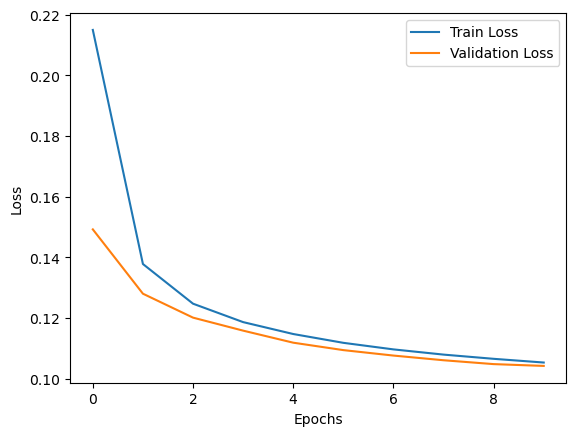

In [5]:
# 2.	Розробити звичайний автокодувальник для датасету MNIST на основі згорткової моделі.

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam

(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізація даних та зміна формату
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)



# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))





plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
Висновок:  в ході практичного завдання я розробив звичайний автокодувальник для датасету MNIST на основі згорткової моделі. Побудував графіки функції втрат
